In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mb
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# cluster the houses by location
# and observe how house prices fluctuate across California.

# Load data set
data=pd.read_csv('https://raw.githubusercontent.com/qisazrin/Q-Datasets/refs/heads/main/housing.csv',usecols=['longitude','latitude','median_house_value'])
data

# longitude: A value representing how far west a house is. Higher values represent houses that are further West.
# latitude:  A value representing how far north a house is. Higher values represent houses that are further north.
# median_house_value: The median house price within a block measured in USD.

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


<Axes: xlabel='longitude', ylabel='latitude'>

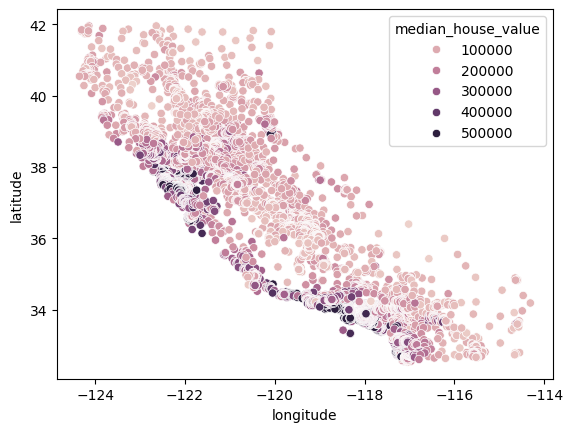

In [50]:
# Visualize data
# look at the location data with a heatmap based on the median price in a block

sb.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value')


In [51]:
# Normalizing Data
x_train, x_test, y_train, y_test = train_test_split(data[['latitude','longitude']], data[['median_house_value']], test_size=0.33, random_state=0)

# now normalizing using preprocessing.normalize() method
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

In [52]:
# Fitting and evaluating the model

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_train_norm)

#Once the data are fit, we can access labels from the labels_ attribute.
# Below, we visualize the data we just fit.

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

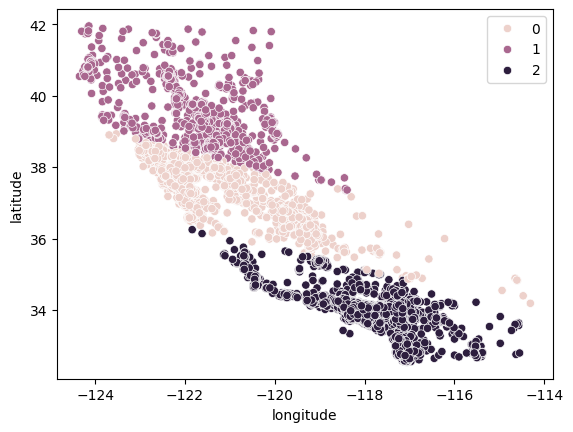

In [53]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=kmeans.labels_)

#We see that the data are now clearly split into 3 distinct groups
 #(Northern California, Central California, and Southern California).
 #We can also look at the distribution of median house prices in these 3 groups using a boxplot.

<Axes: ylabel='median_house_value'>

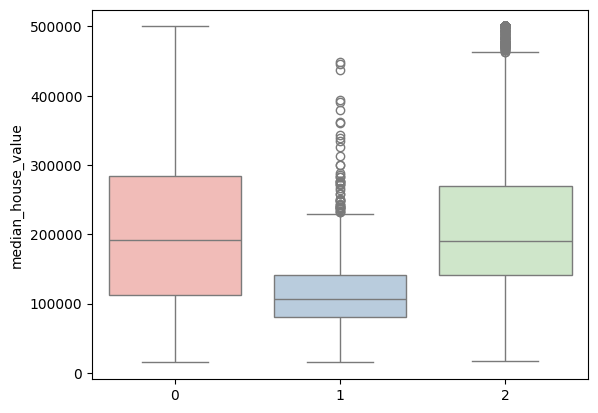

In [54]:
sb.boxplot(x=kmeans.labels_,y=y_train['median_house_value'], palette='Pastel1')

#We clearly see that the Northern and Southern clusters have similar distributions of median house values
 #(clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1).

In [55]:
# now we can evaluate performance of the clustering algorithm using a silhouette

silhouette_score(x_train_norm, kmeans.labels_, metric= 'euclidean')

#Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 3 model is.
#In the next section, we will explore different clusters and compare performance to make a decision on the best hyperparameter values for our model.

np.float64(0.7499371920703546)

In [85]:
# Choosing the best number of clusters

#need to test ranges of values and make a decision on the best value of k.
#create the below loop to test and store different model results so that we can make a decision on the best number of clusters.

kv = range(2,8)
fits = []
scores = []       #stay as a list

for k in kv:
  #train the model for current value of k on training data
  model = KMeans(n_clusters=k, random_state=0, n_init='auto')
  model.fit(x_train_norm)

  #append the model to fits
  fits.append(model)

  #compute silhouette score
  labels=model.labels_
  score=silhouette_score(x_train_norm, labels, metric='euclidean')
  scores.append(round(float(score) ,5))
  print(scores)

[0.77541]
[0.77541, 0.74994]
[0.77541, 0.74994, 0.67207]
[0.77541, 0.74994, 0.67207, 0.61943]
[0.77541, 0.74994, 0.67207, 0.61943, 0.62983]
[0.77541, 0.74994, 0.67207, 0.61943, 0.62983, 0.64115]


<Axes: xlabel='longitude', ylabel='latitude'>

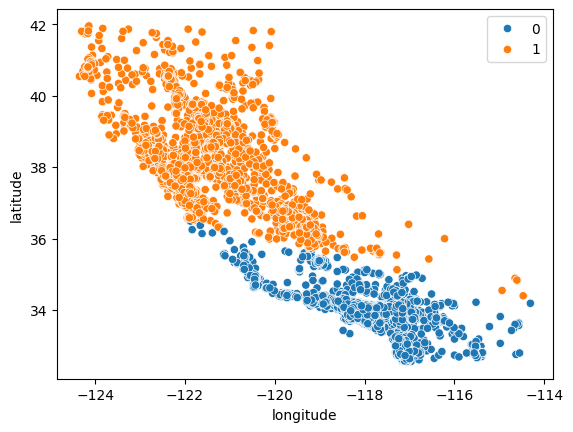

In [86]:
# then we can visually a few different values of k
# look at k= 2

sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

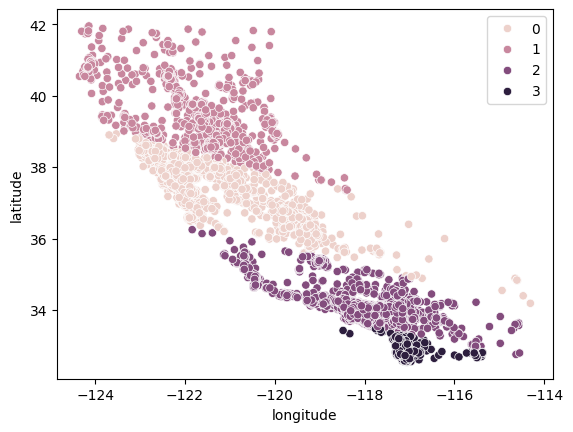

In [87]:
# now look at k=4
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[2].labels_)

# This plot groups California into more logical clusters across the state based on how far North or South the houses are in the state.
# This model most likely captures more nuance in the housing market

<Axes: xlabel='longitude', ylabel='latitude'>

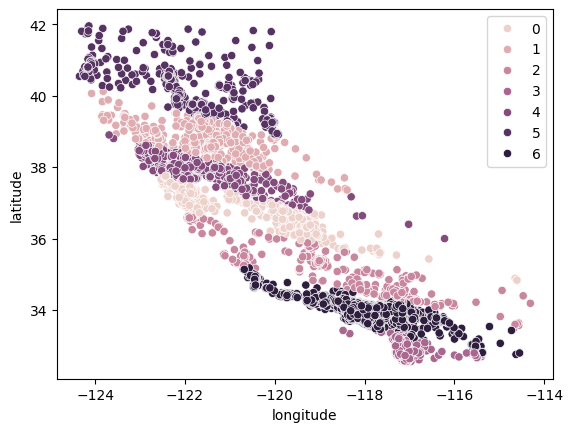

In [88]:
# finally we look at k=7

sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[5].labels_)

#graph appears to have too many clusters. We have sacrifice easy interpretation of the clusters for a “more accurate” geo-clustering result.
#as we increase the value of K, we see improvements in clusters and what they represent until a certain point.
# We then start to see diminishing returns or even worse performance.

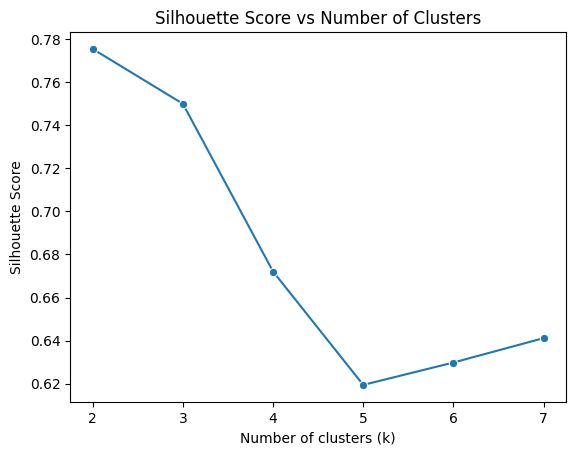

In [90]:
# Using an elbow plot where the y-axis is a measure of goodness of fit and the x-axis is the value of k.

sb.lineplot(x=list(kv), y=scores, marker='o')
mb.title("Silhouette Score vs Number of Clusters")
mb.xlabel("Number of clusters (k)")
mb.ylabel("Silhouette Score")
mb.show()

#see k = 5 is probably the best we can do without overfitting.


<Axes: xlabel='longitude', ylabel='latitude'>

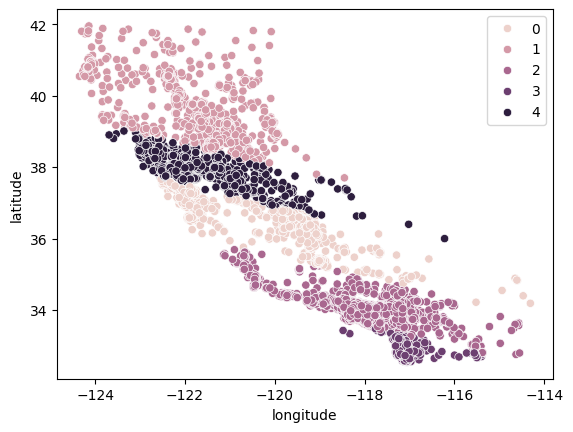

In [91]:
sb.scatterplot(data=x_train,x='longitude',y='latitude',hue=fits[3].labels_)

# the clusters do a relatively good job of breaking California into distinct clusters and
# these clusters map relatively well to different price ranges.

<Axes: ylabel='median_house_value'>

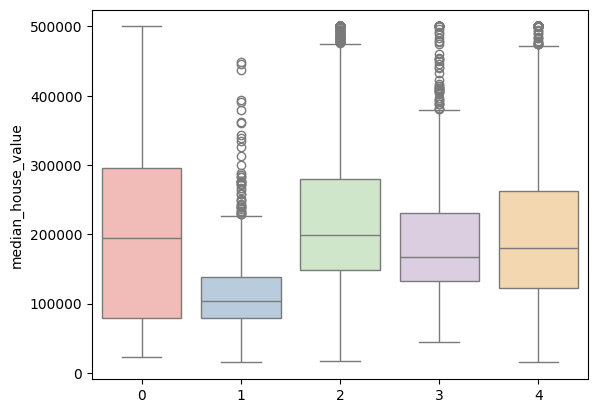

In [94]:
sb.boxplot(x=fits[3].labels_,y=y_train['median_house_value'], palette='Pastel1')
